# Prepare the Notebook for Colab

In [1]:
!pip install control
!git clone https://magiccvs.byu.edu/gitlab/control_book/control_book_public_solutions.git
!cd control_book_public_solutions/;  #git checkout Fall19_edits; 

     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=7ba70bb404cfdbdf1108592c2d19a11719d2df0fa27bac37288388098bee5433
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control
Cloning into 'control_book_public_solutions'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 2444 (delta 2), reused 0 (delta 0), pack-reused 2432
Receiving objects: 100% (2444/2444), 42.78 MiB | 20.49 MiB/s, done.
Resolving deltas: 100% (1257/1257), done.


In [0]:
import sys
import numpy as np
import control as c
from control.matlab import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12) #set the figure size
from IPython.display import Latex
from IPython.display import Image

In [0]:
# How to bring in figures from the git repository
basename = 'control_book_public_solutions/_images/' # use for Google Colab Notebooks
#basename = './' # Use for self-hosted jupyter notebooks
Img1 = Image(filename=basename+'figures_5/ls_margins_2.png',width=700)
Img2 = Image(filename=basename+'figures_5/ls_margins_3.png',width=400)
Img3 = Image(filename=basename+'figures_5/ls_margins_1.png',width=1000)
Img4 = Image(filename=basename+'figures_5/ls_margins_4.png',width=1000)
Img5 = Image(filename=basename+'figures_5/ls_margins_5.png',width=430)
Img6 = Image(filename=basename+'figures_5/ls_margins_6.png',width=400)
Img7 = Image(filename=basename+'figures_5/ls_closed_loop_response.png',width=1200)
Img8 = Image(filename=basename+'figures_5/ls_size_input_signal.png',width=1200)
Img9 = Image(filename=basename+'figures_5/ls_margins_7.png',width=1000)
#Img4 = Image(filename=basename+'figures_5/ls_constraint_gamma_di.png',width=1000)

# Part 5: Loopshaping Control Design
## Chapter 17: Stability & Robustness Margins

### Lecture Notes

This notebook covers the material in Chapter 17 of the [text](http://controlbook.byu.edu/doku.php) in brief form, allowing you to make changes and manipulate the examples.  The goal is for this resource to help you bridge the gap between theory and the practical.

## 17.1.1 Phase and Gain Margins
Closed loops systems need to be stable - it's the whole point of control!  So how do we make sure that systems are stable when working in the frequency domain?  Recall that our closed loop transfer function is of the form: 

$H(j\omega) = \frac{P(j\omega)C(j\omega)}{1 + P(j\omega)C(j\omega)}$ 

Note that a critical point for our transfer function is the point where the denominator is equal to $0$ (e.g. we would like to avoid that condition).  Obviously this occurs when  $P(j\omega)C(j\omega) = -1$. 

Graphically, the vector sum of our denominator on the real-imaginary plane  is shown below. 

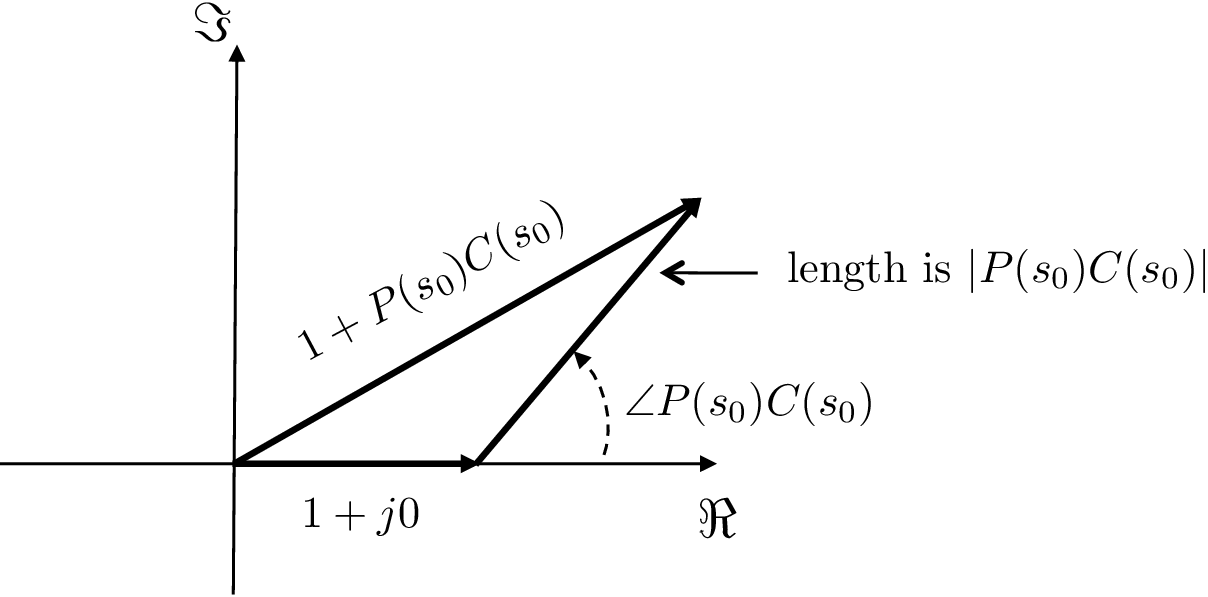

In [0]:
Img1

The condition that we would like to avoid is plotted below: where $P(j\omega)C(j\omega) = -1$

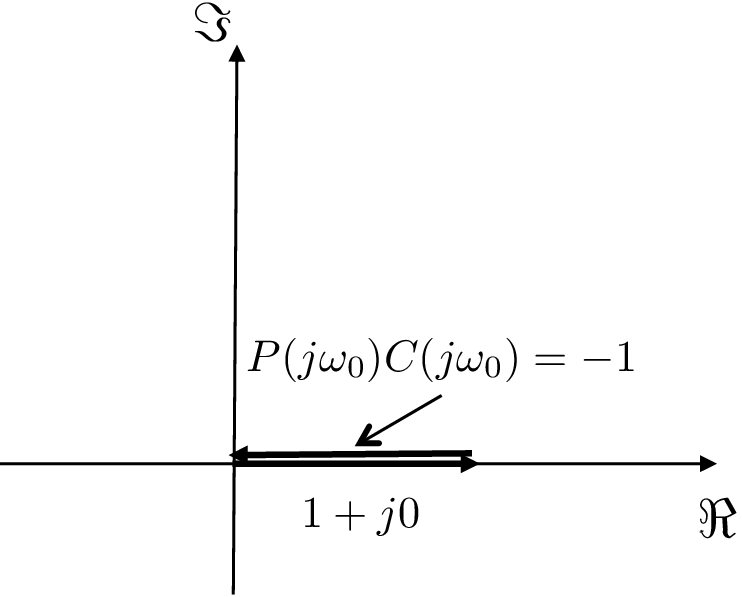

In [0]:
Img2

Up to this point we have mostly been paying attention to the magnitude plots of our system.  But when we examine stability, we are paying the most attention to the phase plot (the magnitude plot does plays a roll).  The reason is fairly obvious, only when the phase of the Loopgain is $\pm180^o$, could we potentially have the situation shown above.  

We define the *crossover frequency* $\omega_{co}$ as the frequency where $|P(j\omega)C(j\omega)| = 1, $ or equivanlently when $20\log_{10}|P(j\omega)C(j\omega)| = 0dB$. 

At the crossover frequency, we are concered with the phase $\phi$ of the system.  If $\phi = \pm180^o$, then our system is unstable (dividing by zero).  The amount of phase we are above $-180^o$ is known as the **phase margin (PM)** and is indicative of the *stability* of the system. (Note that we are usually at negative phases, since we are lagging the input signal, not leading it.)  A good rule of thumb is that the system should have around $60^o$ of phase margin.  

Another indicator is known as the **gain margin (GM)**.  The gain marigin is defined as the magnitude of the system when $\phi = 180^o$.  If the phase of system never crosses $180^o$, then our *gain margin is infinite*.  

The figure below depicts PM and GM on a bode plot.  Note that the Phase Margin is defined on the phase plot, when the magnitude is $1$ or $0$dB. The Gain Margin is defined on the magnitude plot when the phase is $-180^o$.  The following two figures illustrate PM and GM on the real-imaginary plane.  The three images are therefore equlivalent in definition.  

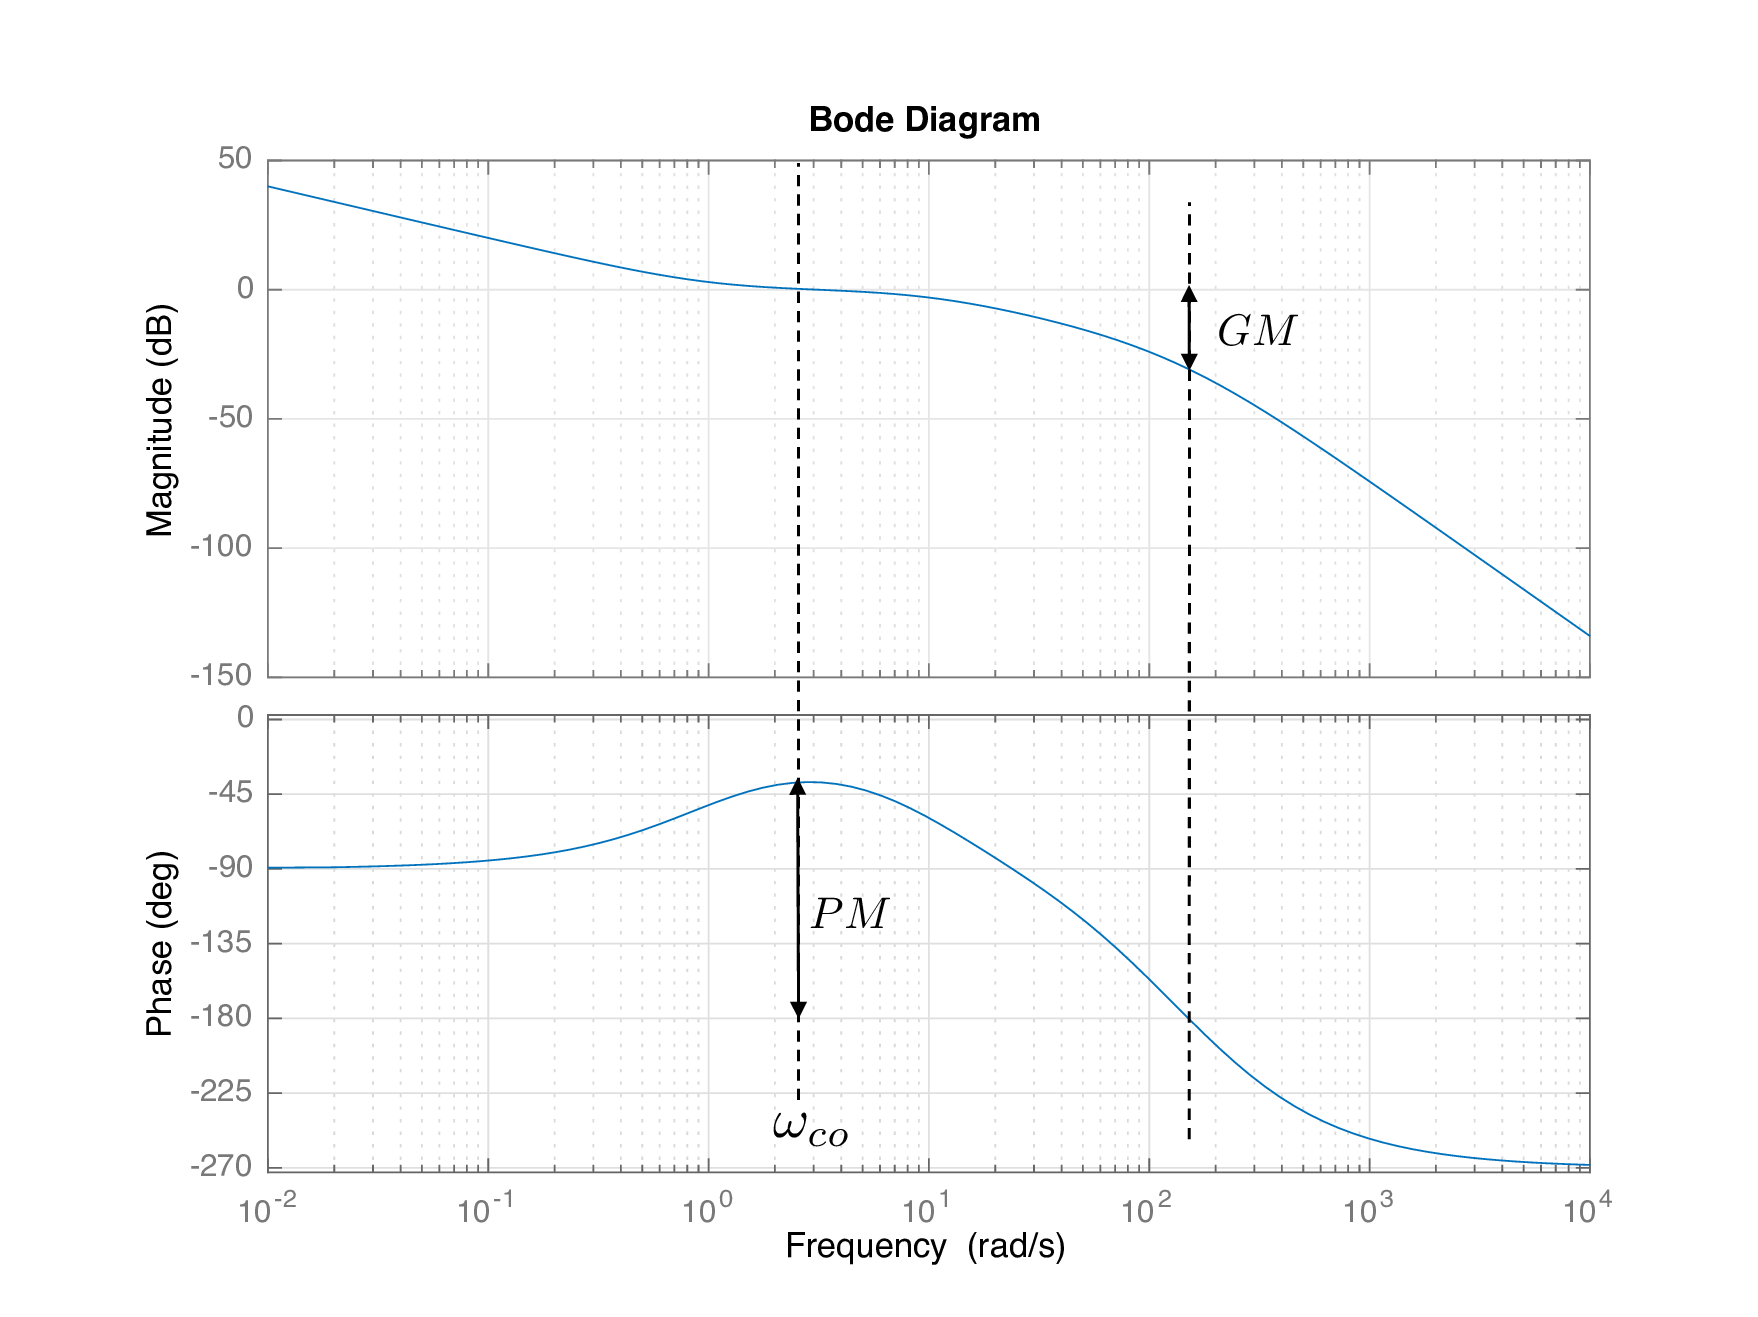

In [0]:
Img4

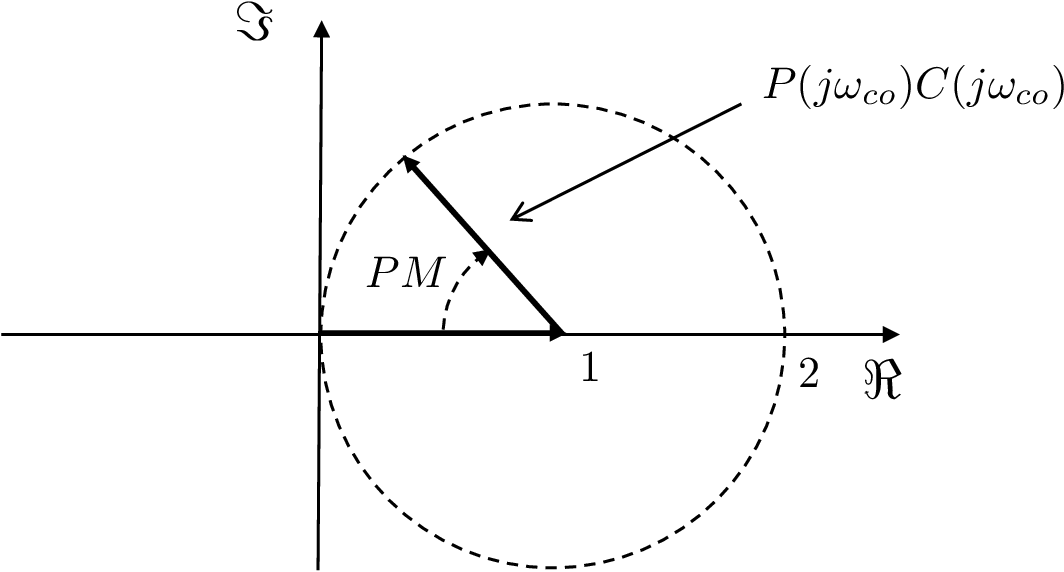

In [0]:
Img5

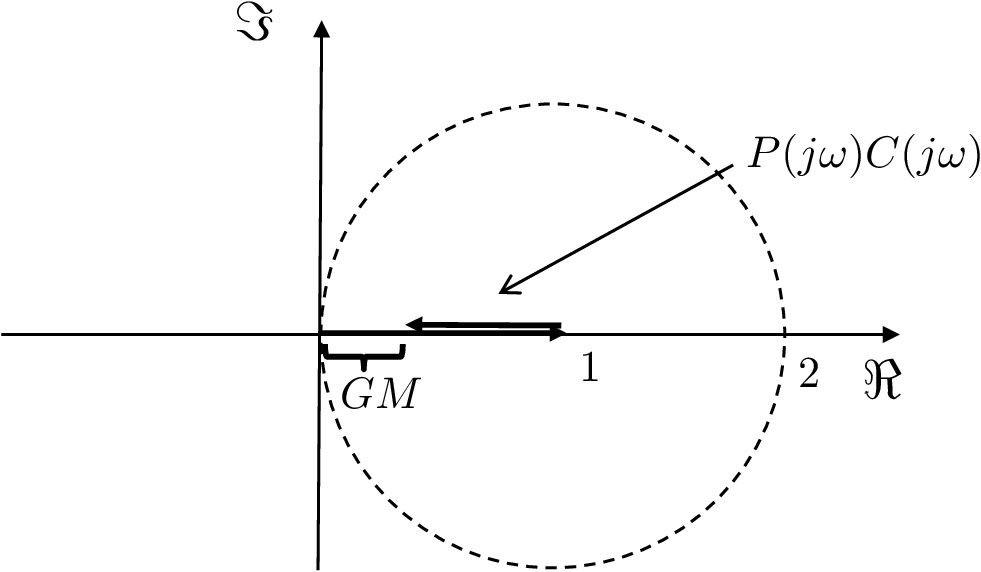

In [0]:
Img6

The PM and GM can be extracted automatically by the 'margin' command in Matlab and plotted on a Bode plot.  In the Python Controls library, they are also found with the 'margin' command, but are returned as arguments rather than plotted.  

## 17.1.2. Open and Closed Loop Frequency Response
The figure below shows the closed-loop Bode plot superimposed on the open loop Bode plot (loopgain) for different values of the phase margin.  Note that when the phase margin is $PM=60$ degrees, the closed-loop frequency response looks very similar to the closed-loop frequency response for a second order system when $\zeta=0.707$.  Phase margins smaller than $60$~degrees have a peaking response similar to second order system with $\zeta<0.707$.  Note also that the bandwidth of the closed-loop system is approximately the crossover frequency of the open loop system.  In general, the crossover frequency $\omega_{co}$ plays a similar role for general systems that the natural frequency $\omega_n$ plays for second order systems. 

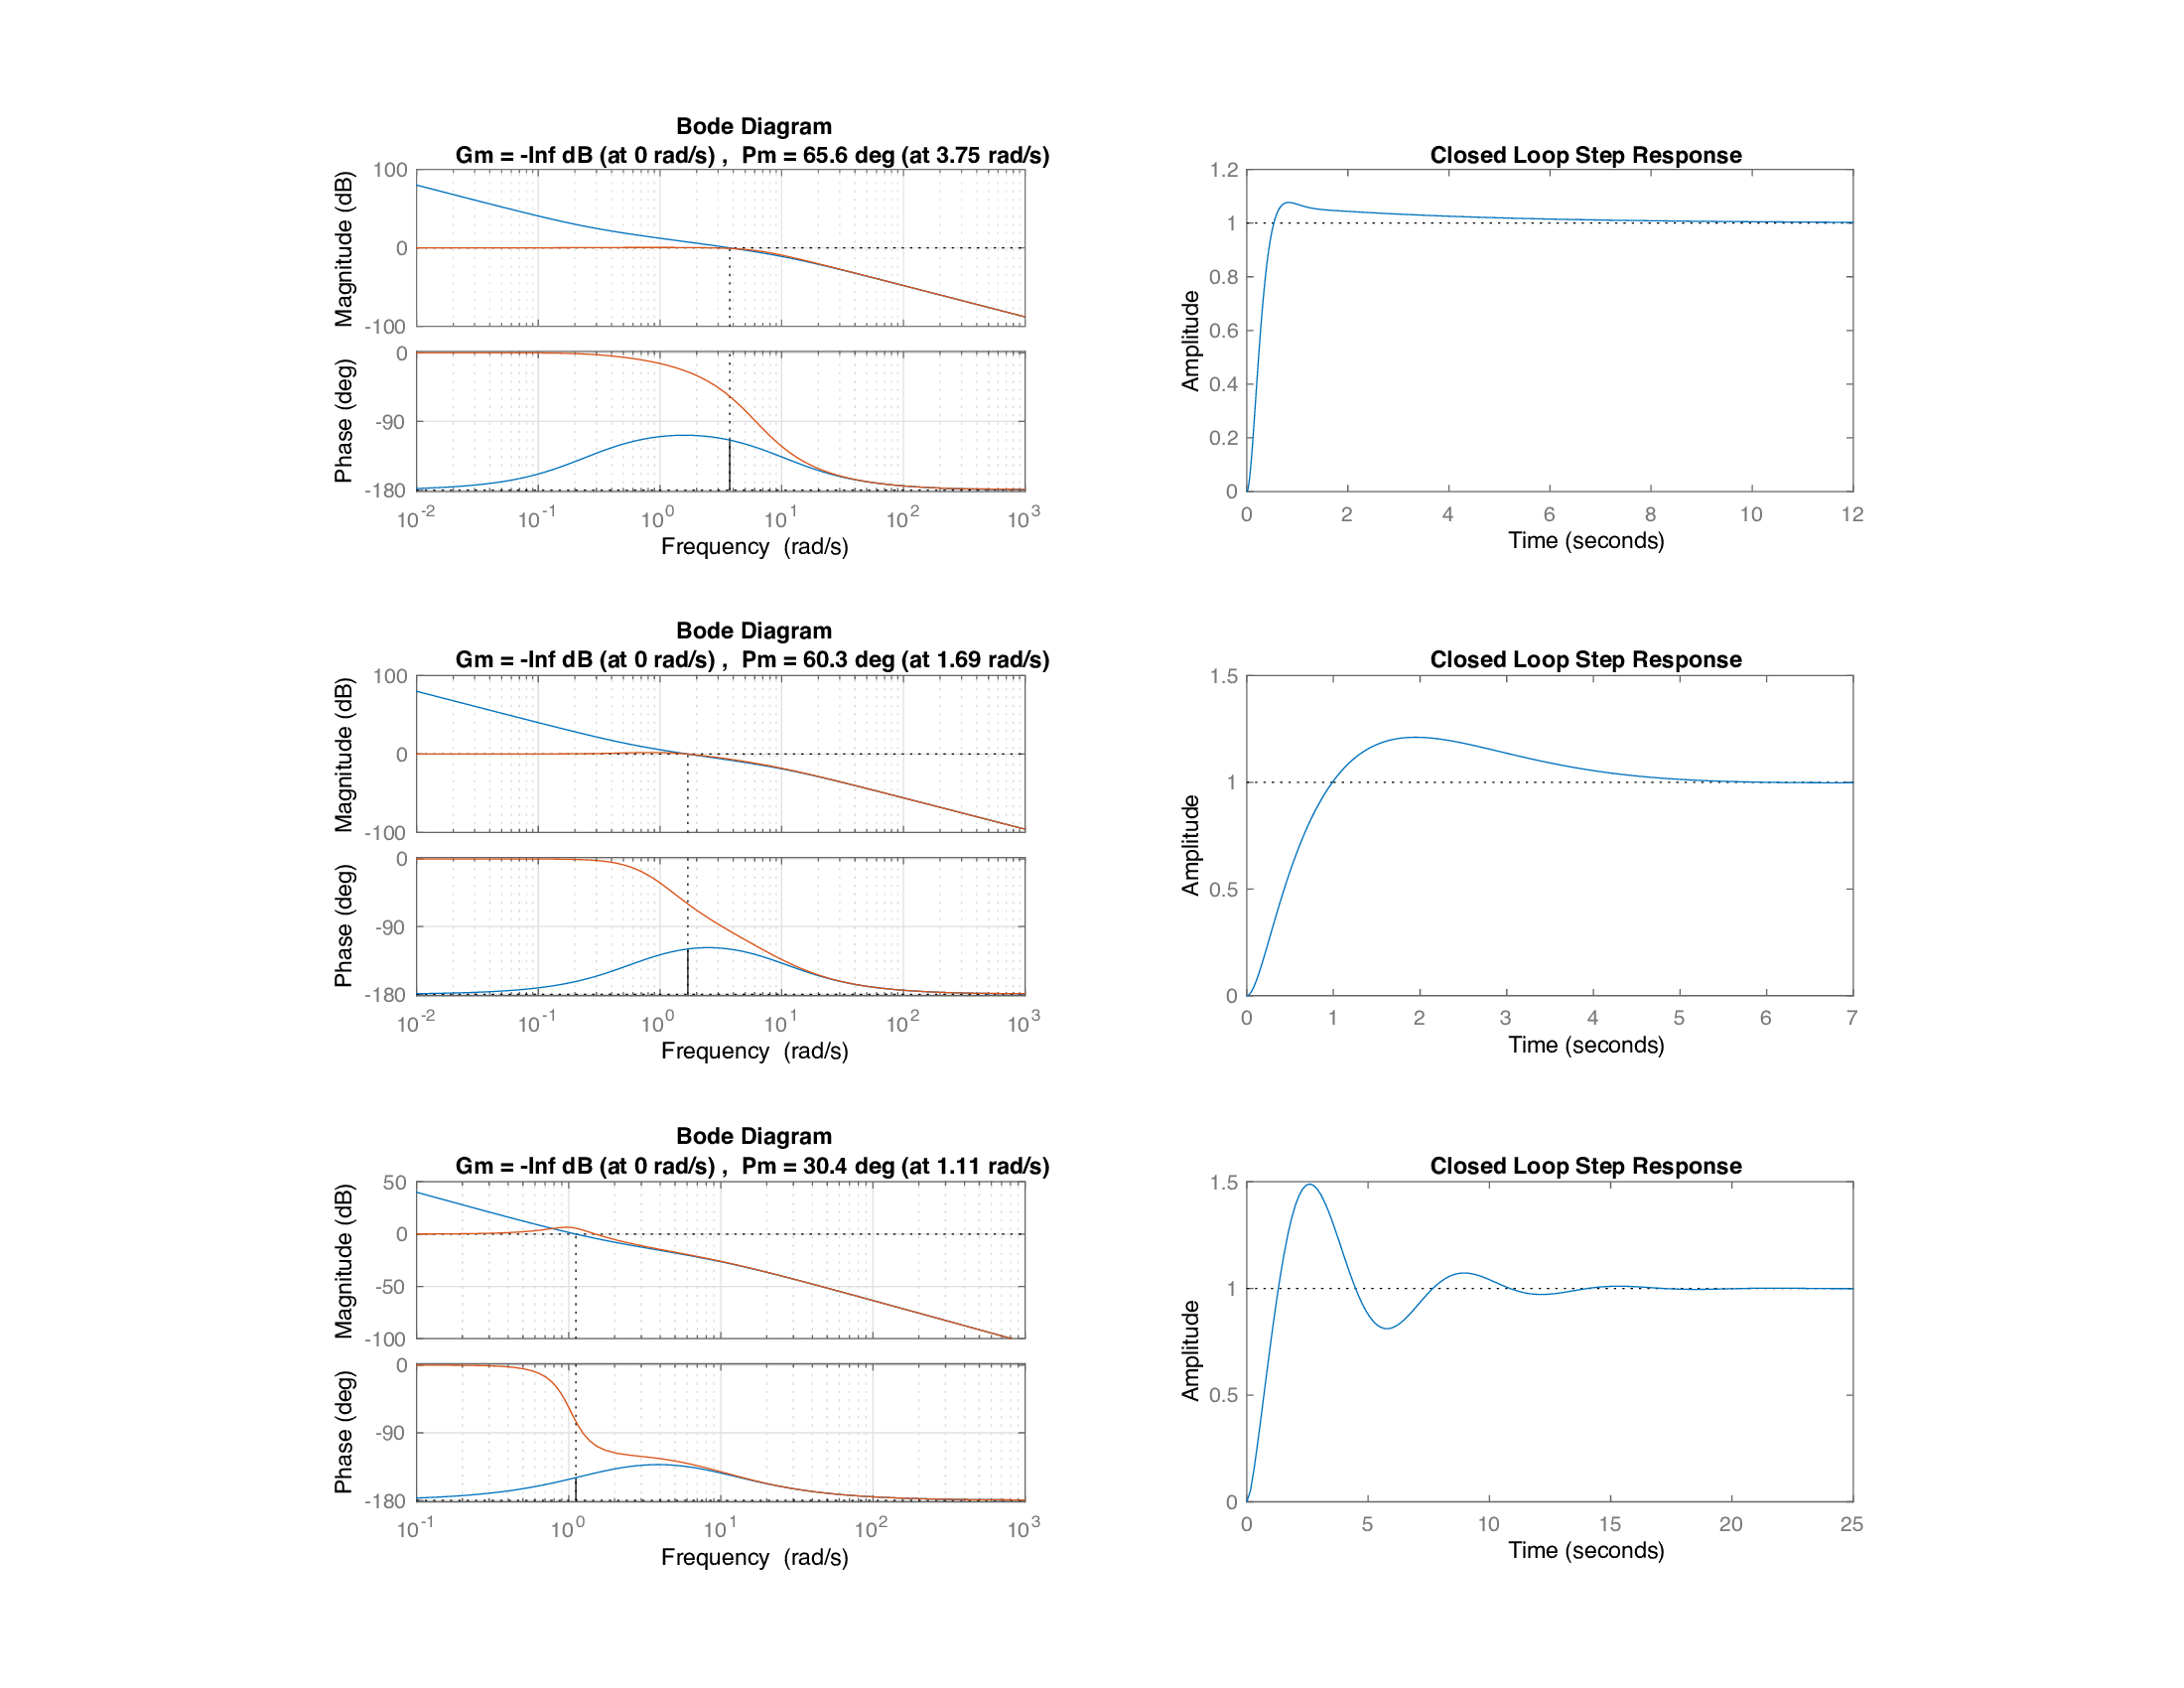

In [0]:
Img7

## TODO: Replace this plot with interactive
This plot is a lot harder to do in python than matlab... Finish another time.  

Text(0.5, 1.0, 'Performance Changes with $\\zeta$')

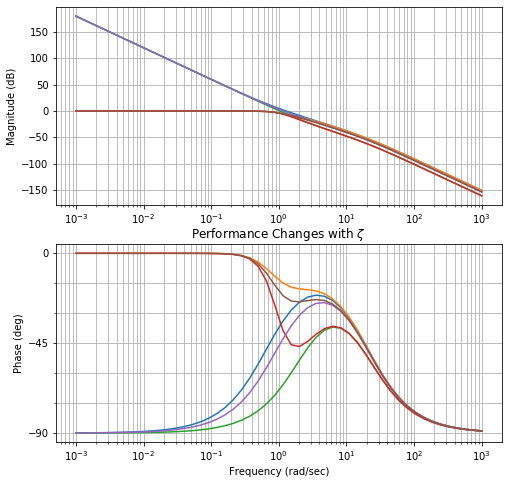

In [0]:
# Now hold wn constant, and vary zeta
# Feel free to vary the parameters and see how things change: 
#%matplotlib tk 
wn = 1.
zeta=[.707,0.2, 0.5]
sigma = 0.05
omega = (0.001,1000)

# Plant parmeters we are going to try for the example. 
P = tf([1.],[1.,0.,0.,0.])
a0 = 0.
a1 = 0.
b0 = 1. 

fig, axs = plt.subplots(nrows=, ncols=2, figsize=(8, 8))
axs = axs.ravel()
i = 0; 
for z in zeta:
    alpha0 = wn**2. 
    alpha1 = 2.*z*wn
    Kp = -(alpha0 - a0)/b0
    Kd = -(alpha1 - a1)/b0
    C_pd = tf([(Kp*sigma + Kd), Kp],[sigma, 1.])
    PC = series(P,C_pd)
    PC_closed = feedback(PC,1.)
    # Bode plots first, then step: 
    axs[i].
    mag, phase, w = bode(PC, PC_closed,omega_limits=omega, Hz=False)
    axs[i].legend(['LoopGain','Closed Loop'], loc=0)
    i = i + 1
    t, yout = step(PC_closed)
    axs[i].plot(t,yout,label='zeta='+str(z))
    axs[i].set_title('Damping zeta: ' + str(z))
    axs[i].set_xlabel('t (s)')
    i = i + 1
fig.title('Performance Changes with zeta')
fig.tight_layout()

## Crossover Frequency
For a given reference signal, the size of the control signal $u(t)$ is determined by the crossover frequency.  A large crossover frequency will result in a larger control signal $u(t)$.    The figure below shows the open and closed-loop transfer functions for a plant equal to $P(s) = 1/s(s+1)$ and for three different controllers that are tuned for equivalent phase margins but with cross over frequency at $2$, $20$, and $200$ respectively.  The corresponding control signal when the reference is a unit step is also shown.  Note that as $\omega_{co}$ increases, the magnitude of the control signal increases and the speed of the response also increases.  In fact, the integral of the control signals will be the same for each $\omega_{co}$.  Therefore, saturation constraints on $u(t)$ will necessarily limit the size of the cross over frequency $\omega_{co}$.

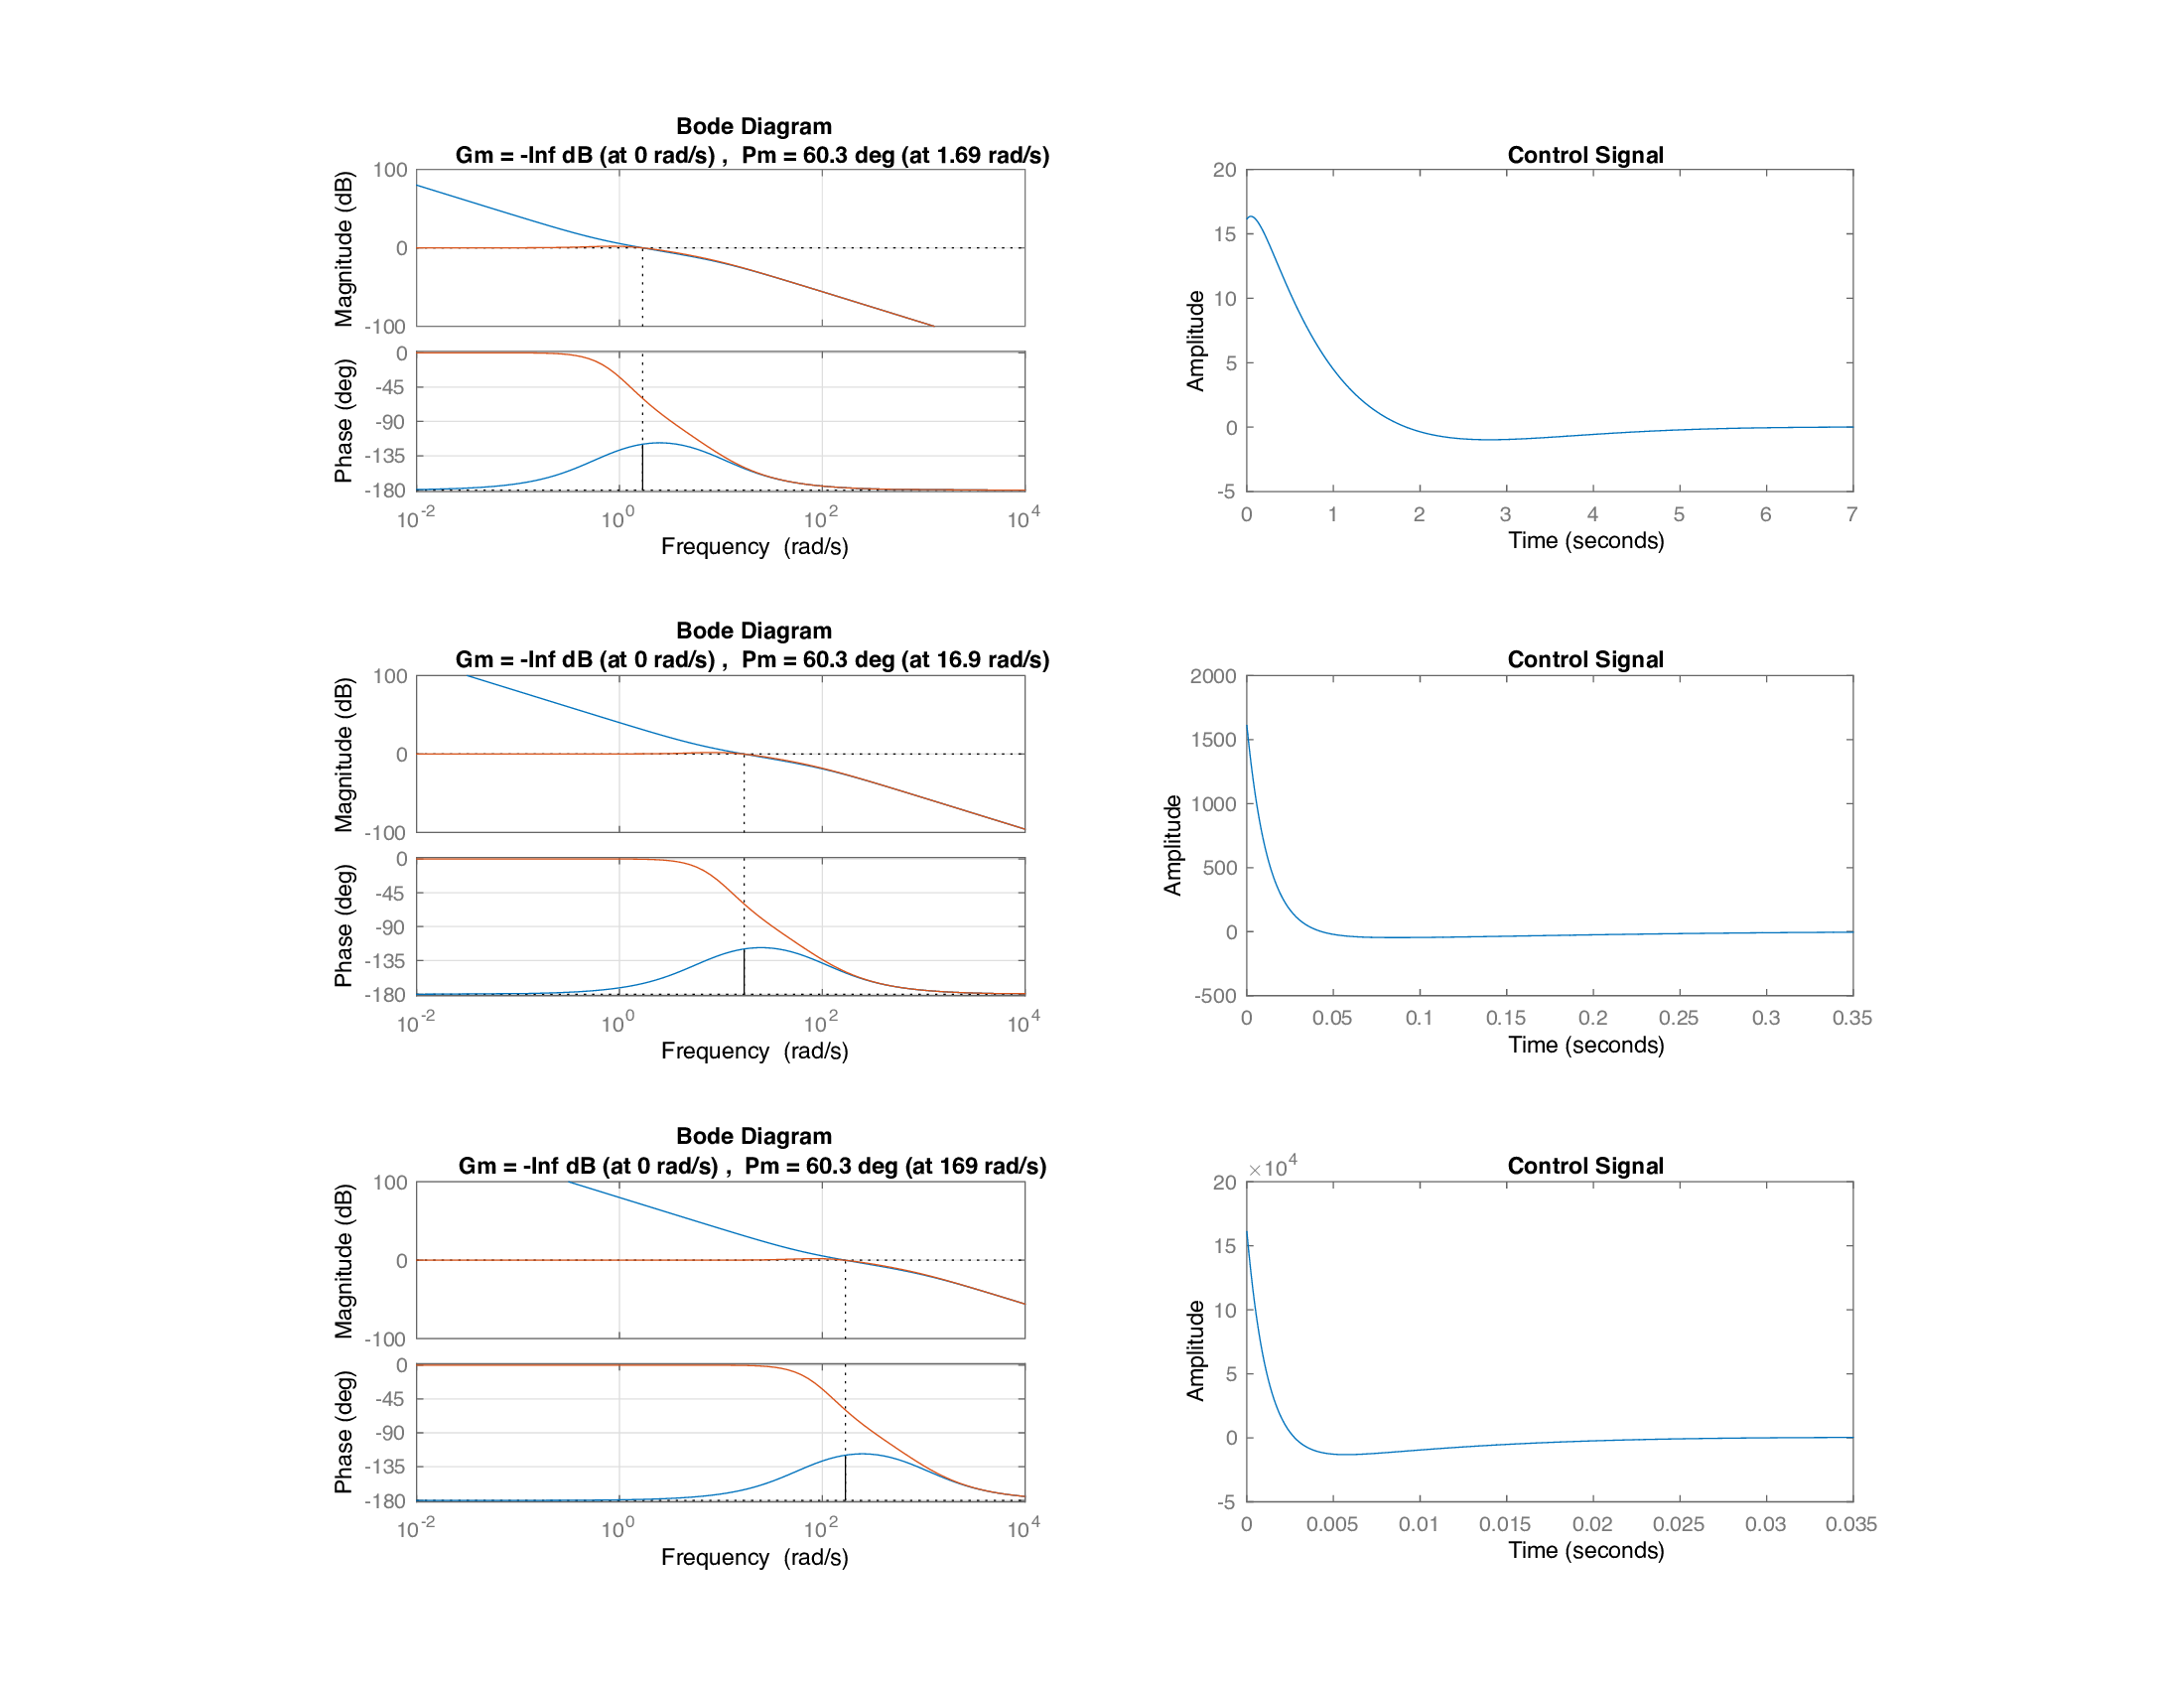

In [0]:
Img8

## 17.1.3 Bode Phase Gain Relationship
In Bode's original work, he proved a theorem that relates the slope of the magnitude plot to the phase. The details can be found in the text, but the take away for us is that this theorem implies that the phase of $P(j\omega)C(j\omega)$ at $\omega=\omega_0$ is determined by the slope of the Bode magnitude plot in a region about $\omega_0$. 

This has clear implications for feedback design.  
In particular, the takeaway message is that to have a good phase margin, the slope of the Bode magnitude plot at the crossover frequency $\omega_{co}$ cannot be too steep, and that it needs to be reasonably shallow for roughly a decade before and after crossover.  As a rule of thumb, a phase margin of $PM=60$ degrees requires that the slope at crossover is between $-20$ dB/dec and $-40$ dB/dec.  In other words, the ideal loopshape will need to look something like the figure below. 

It is also important to understand that the Bode phase-gain theorem requires that there is adequate frequency separation between the frequency content of signals that we are tracking or rejecting, and the frequency content of the sensor noise that is to be attenuated.

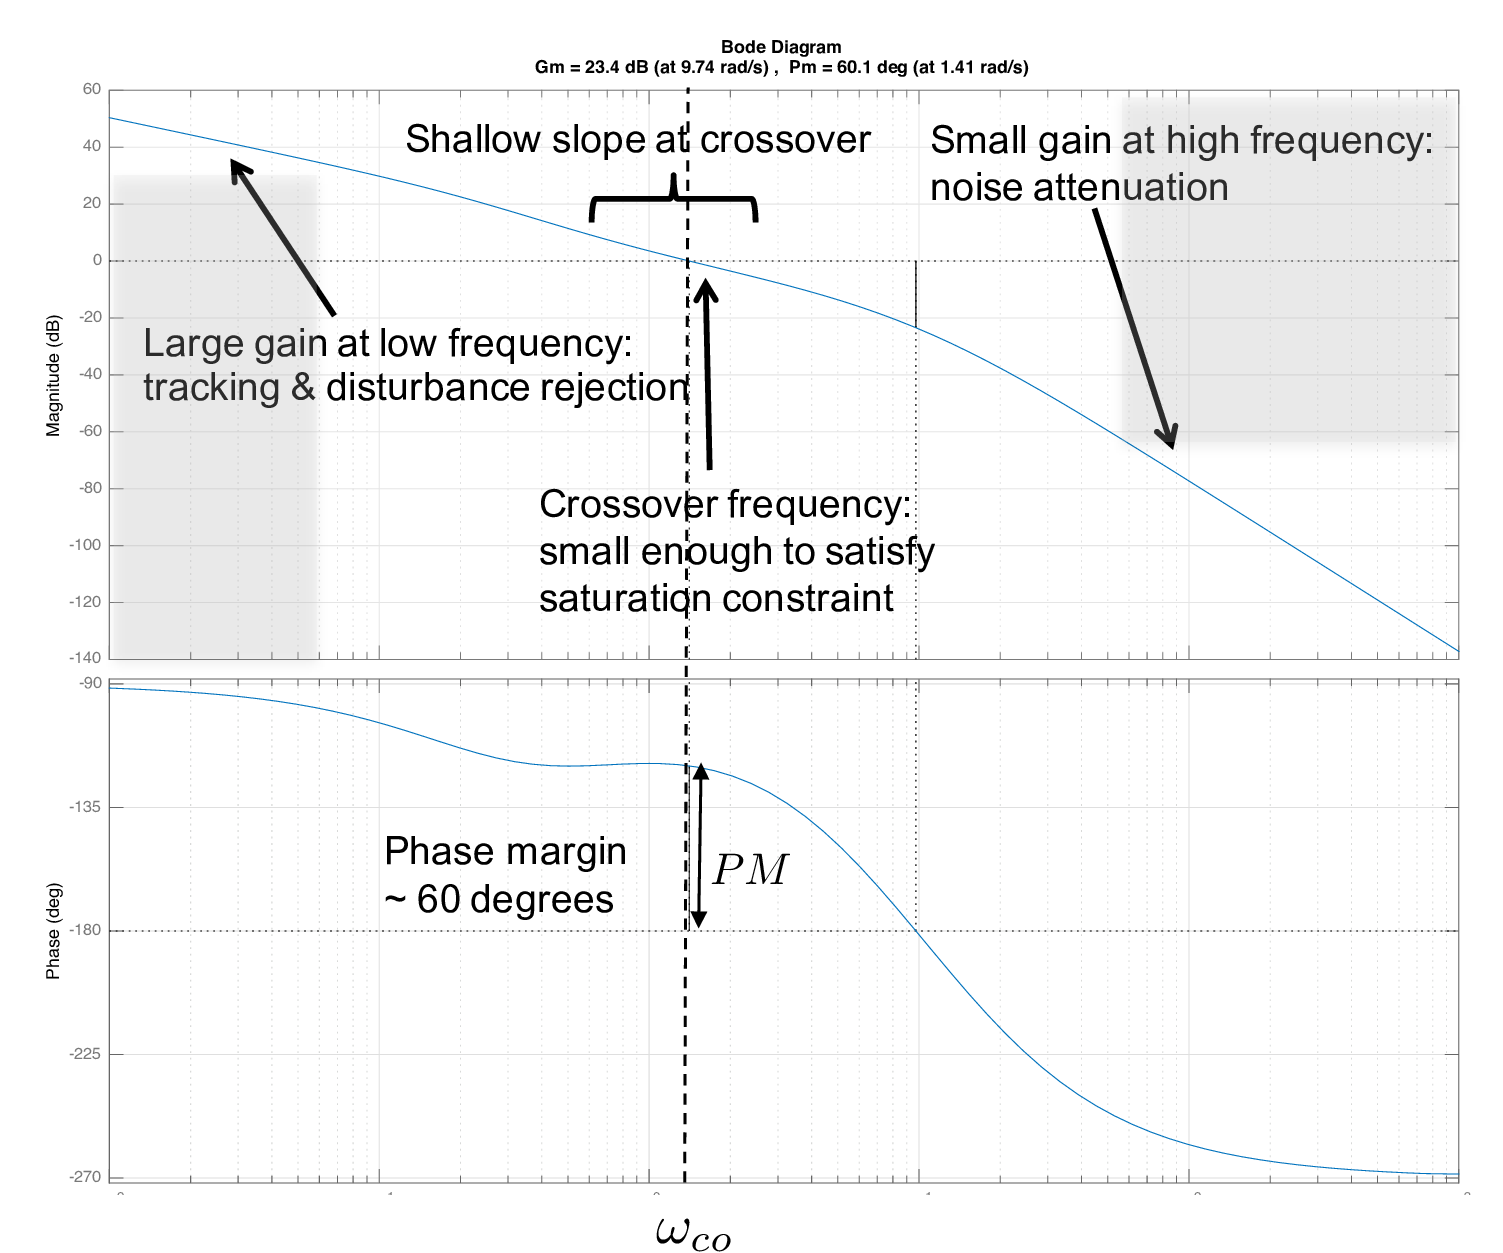

In [0]:
Img9

# Examples: Design Study A. Single Link Robot Arm
For the single link robot arm, use the bode and margin commands to find the phase and gain margin for the closed loop system under PID control. On the same graph, plot the open loop Bode plot and the closed loop Bode plot. What is the bandwidth of the closed loop system, and how does this relate to the crossover frequency? Use the gains found in HW A.10.

In [11]:
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_a_arm/python/')
sys.path.append('control_book_public_solutions/_a_arm/python/hw10/')  # add homework directory
import armParam as P
import hw10.armParamHW10 as P10

kp:  0.45374999999999993
ki:  0.1
kd:  0.06665499999999998


In [12]:
# Compute the transfer functions: 
#G2 = tf([3/P.m/P.ell**2],[1, 3*P.b/P.m/P.ell**2, -3.*P.g*np.sin(th_e)/2./P.ell]) # Jacobian Linearized
G = tf([2./P.m/P.ell**2.],[1., 2.*P.b/P.m/P.ell**2., 0.]) # feedback linearlized form 
print("Plant: ", G)
C_pid = tf([P10.kd,P10.kp,P10.ki],[P.sigma,1.,0.]) 
print("Control: ", C_pid)
PC = series(G,C_pid)
print("Loopgain: ", PC)

Plant:  
    44.44
-------------
s^2 + 2.222 s

Control:  
0.06665 s^2 + 0.4537 s + 0.1
----------------------------
        0.05 s^2 + s

Loopgain:  
  2.962 s^2 + 20.17 s + 4.444
--------------------------------
0.05 s^4 + 1.111 s^3 + 2.222 s^2



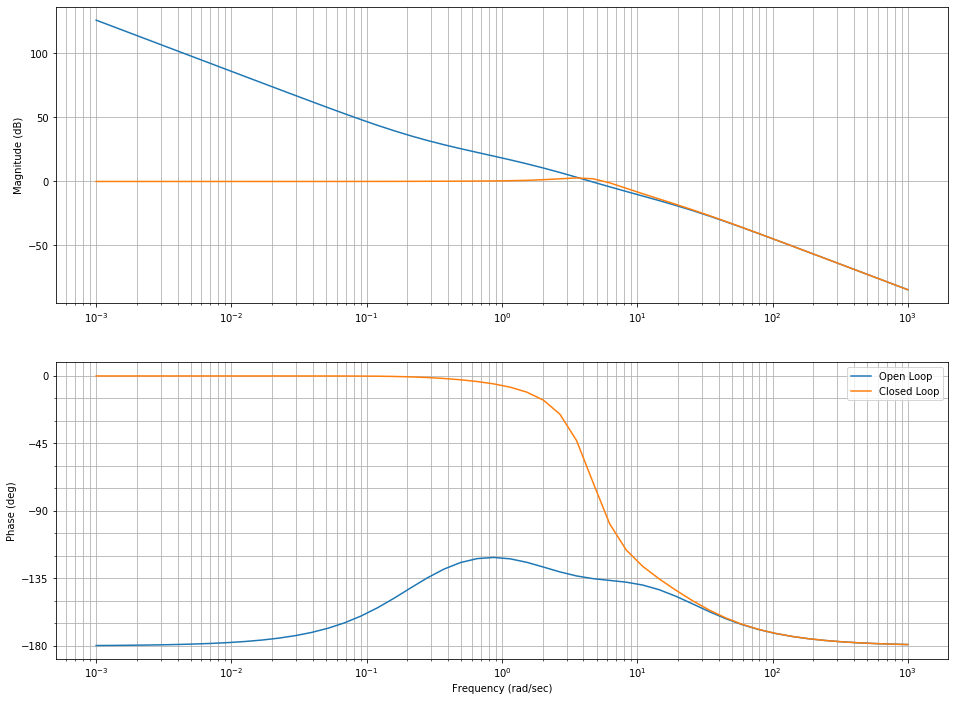

In [15]:
mag1, ph1, w1 = bode(PC,G*C_pid/(1+G*C_pid), omega_limits=omega, Hz=False)
plt.legend(['Open Loop','Closed Loop'], loc=0)

In [13]:
gm, pm, Wcg, Wcp = margin(PC)
print('Phase Margin: ', pm, ' Gain Margin: ', gm)

Phase Margin:  44.99660722885466  Gain Margin:  inf


# Examples - Design Study B: Inverted Pendulum
> (a)  For the inner loop of the inverted pendulum, use the Python bode and margin commands to find the phase and gain margin for the inner loop system under PD control. On the same graph, plot the open loop Bode plot and the closed loop Bode plot. What is the bandwidth of the inner loop, and how does this relate to the crossover frequency?

> (b)  For the outer loop of the inverted pendulum, use the Python bode and margin commands to find the phase and gain margin for the outer loop system under PID control. Plot the open and closed loop Bode plots for the outer loop on the same plot as the open and closed loop for the inner loop. What is the bandwidth of the outer loop, and how does this relate to the crossover frequency?

> (e)  What is the bandwidth separation between the inner (fast) loop, and the outer (slow) loop? For this design, is successive loop closure justified?

In [0]:
# Design Problem B : Pendulum
sys.path.remove('control_book_public_solutions/_a_arm/python/')
sys.path.remove('control_book_public_solutions/_a_arm/python/hw10/')

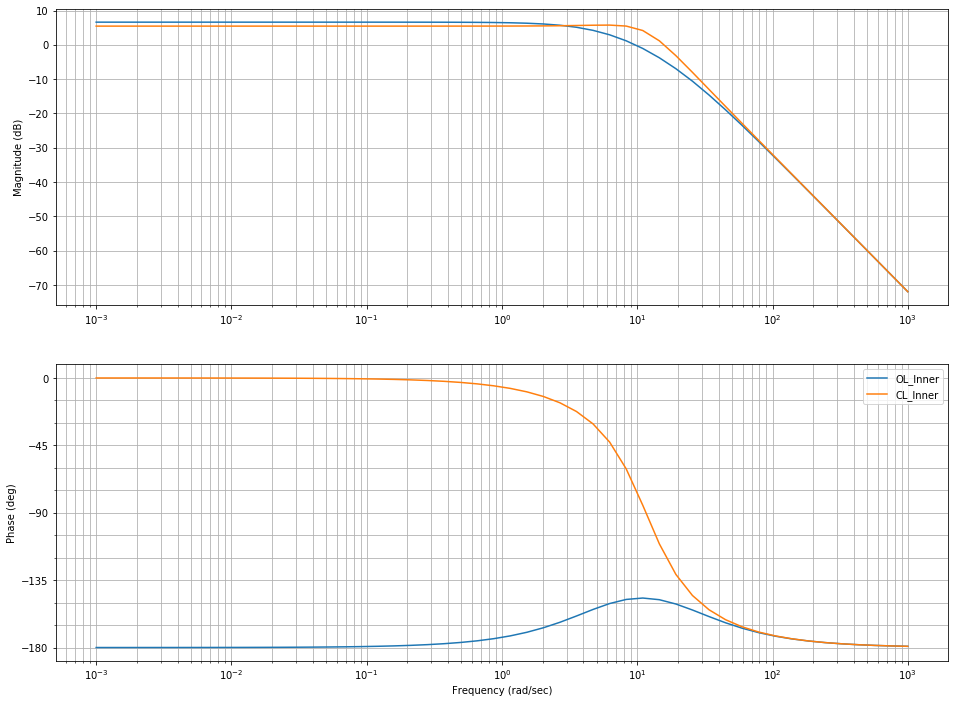

In [7]:
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_B_pendulum/python')
sys.path.append('control_book_public_solutions/_B_pendulum/python/hw10/')  # add homework directory
import pendulumParam as P
import hw10.pendulumParamHW10 as P10

omega = (0.001,1000)

#Compute inner and outer open-loop transfer functions
temp = P.m1*P.ell/6+P.m2*2*P.ell/3
P_in = tf([-1/temp], [1, 0, -(P.m1+P.m2)*P.g/temp])
P_out = tf([-2*P.ell/3, 0, P.g], [1, 0, 0])

# Compute inner and outer closed-loop transfer functions
C_in = tf([P10.kd_th+P10.sigma*P10.kp_th, P10.kp_th],
[P10.sigma, 1])
C_out = tf([P10.kd_z+P10.kp_z*P10.sigma,
P10.kp_z+P10.ki_z*P10.sigma, P10.ki_z],
[P10.sigma, 1, 0])

# Plot the closed loop and open loop bode plots for the inner loop
mag1, ph1, w1 = bode(P_in*C_in,P_in*C_in/(1+P_in*C_in), omega_limits=omega, Hz=False)
plt.legend(['OL_Inner','CL_Inner'], loc=0)

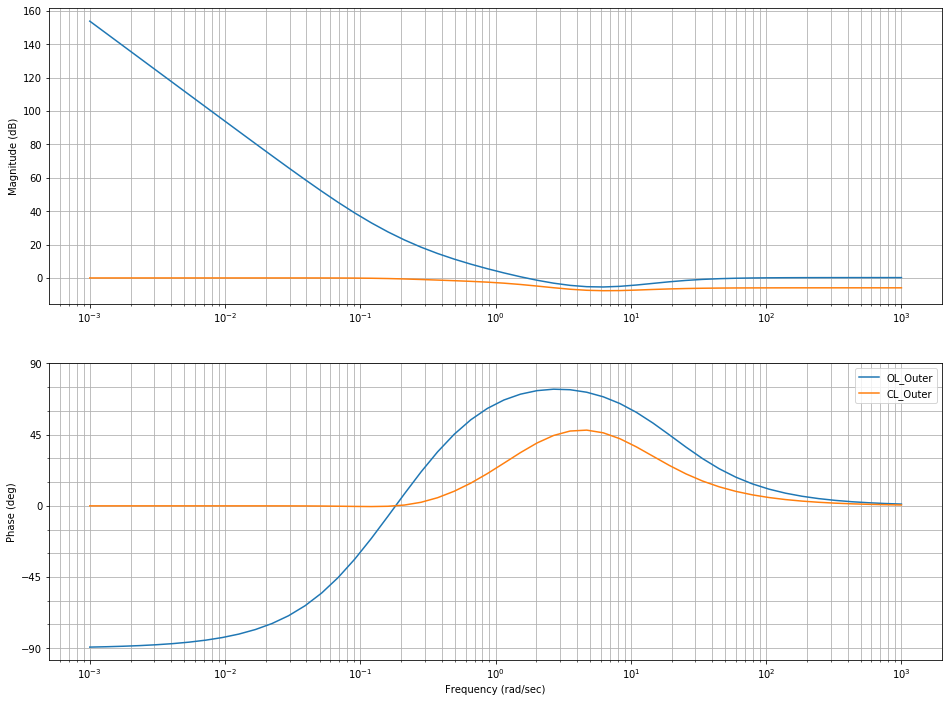

In [8]:
# Plot the closed loop and open loop bode plots for the outer loop
mag2, ph2, w2 = bode(P_out*C_out, P_out*C_out/(1+P_out*C_out),omega_limits=omega, Hz=False)
plt.legend(['OL_Outer','CL_Outer'], loc=0)

In [10]:
# Calculate the phase margin (PM) and gain margin (GM) 
gm, pm, Wcg, Wcp = margin(P_in*C_in)
print("Inner Loop: GM: ",gm," PM: ", pm," omega_GM: ", Wcg, " omega_PM: ", Wcp)
gm, pm, Wcg, Wcp = margin(P_out*C_out)
print("Outer Loop: GM: ",gm," PM: ", pm," omega_GM: ", Wcg, " omega_PM: ", Wcp)

Inner Loop: GM:  0.46678763527963185  PM:  32.88190456486589  omega_GM:  0.0  omega_PM:  9.689331920639216
Outer Loop: GM:  0.0  PM:  -108.51779794229193  omega_GM:  0.0  omega_PM:  1.6730465784631168


The inner loop crossover frequency is about 10.4 rad/sec.  The outer loop crossover frequency is about 1.5 rad/sed (loop gain).  That is an order of magnitude, so yes, the successive loop closure assumption is valid in this case.  

# Examples - Design Study C: Satellite Control
> (a) For the inner loop of the satellite attitude controller, use the Matlab bode and margin commands to find the phase and gain margin for the inner loop system under PD control. On the same graph, plot the open loop Bode plot and the closed loop Bode plot. What is the bandwidth of the closed loop system, and how does this relate to the crossover frequency?

>(b)  For the outer loop of the satellite attitude controller, use the Matlab bode and margin commands to find the phase and gain margin for the outer loop system under PI control. Plot the open and closed loop Bode plots for the outer loop on the same plot as the open and closed loop for the inner loop. What is the bandwidth of the closed loop system, and how does this relate to the crossover frequency?

>(c)  What is the bandwidth separation between the inner (fast) loop, and the outer (slow) loop? For this design, is successive loop closure justified?

In [0]:
# Design Problem B : Pendulum
sys.path.remove('control_book_public_solutions/_B_pendulum/python/')
sys.path.remove('control_book_public_solutions/_B_pendulum/python/hw10/')

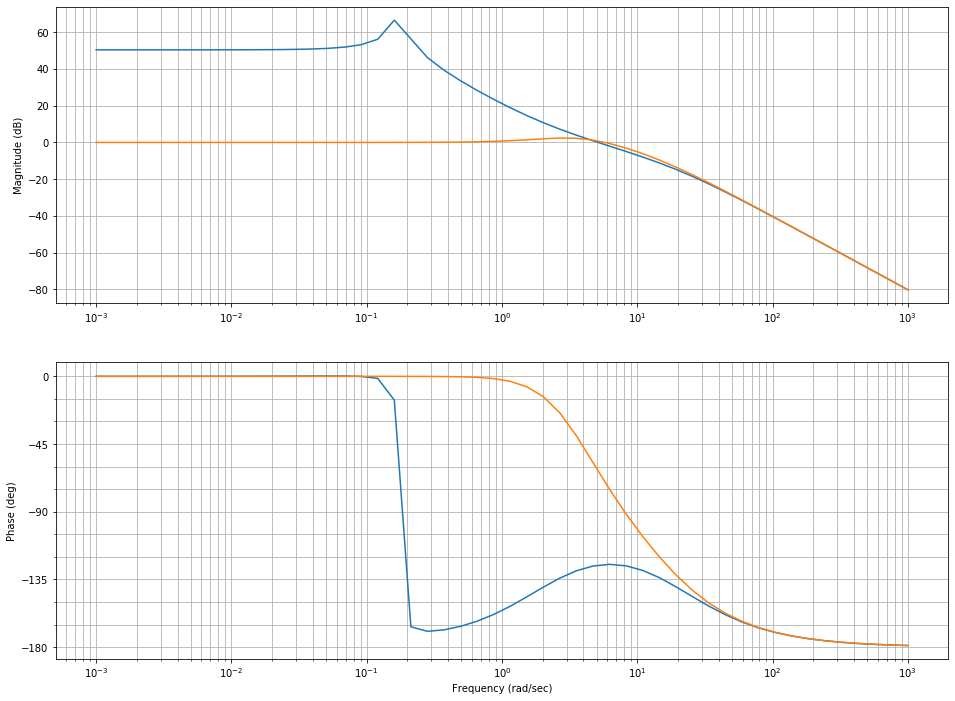

In [7]:
#%matplotlib tk 
sys.path.append('control_book_public_solutions/_C_satellite/python')
sys.path.append('control_book_public_solutions/_C_satellite/python/hw10/')  # add homework directory
import satelliteParam as P
import hw10.satelliteParamHW10 as P10


omega = (0.001,1000)

# transfer functions
P_in = tf([1./P.Js],[1.,P.b/P.Js,P.k/P.Js])
P_out = tf([P.b/P.Jp, P.k/P.Jp],[1.,P.b/P.Jp,P.k/P.Jp])
C_in = tf([(P10.kd_th+P.sigma*P10.kp_th), P10.kp_th],[P.sigma, 1.])
C_out = tf([(P10.kd_phi+P10.kp_phi*P.sigma),(P10.kp_phi+P10.ki_phi*P.sigma),P10.ki_phi],[P.sigma,1.,0.])


# Plot the closed loop and open loop bode plots for the inner loop
mag1, ph1, w1 = bode(P_in*C_in,P_in*C_in/(1+P_in*C_in), omega_limits=omega, Hz=False)

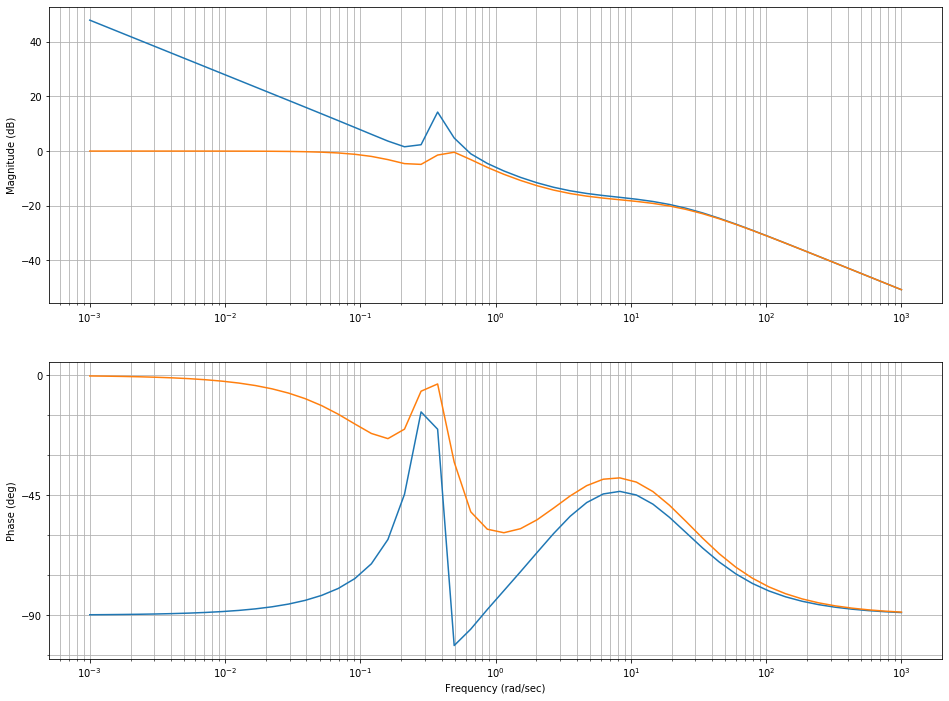

In [8]:
# Plot the closed loop and open loop bode plots for the outer loop
mag2, ph2, w2 = bode(P_out*C_out, P_out*C_out/(1+P_out*C_out),omega_limits=omega, Hz=False)

In [10]:
# Calculate the phase and gain margin
gm, pm, Wcg, Wcp = margin(P_in*C_in)
print("Inner Loop: GM: ",gm," PM: ", pm," omega_GM: ", Wcg, " omega_PM: ", Wcp)
gm, pm, Wcg, Wcp = margin(P_out*C_out)
print("Outer Loop: GM: ",gm," PM: ", pm," omega_GM: ", Wcg, " omega_PM: ", Wcp)

Inner Loop: GM:  inf  PM:  54.43434040383585  omega_GM:  nan  omega_PM:  5.127662978709061
Outer Loop: GM:  inf  PM:  83.05328549240653  omega_GM:  nan  omega_PM:  0.61491652267069


The inner loop crossover frequency is about 6 rad/sec.  The outer loop crossover frequency is about 0.6 rad/sed (loop gain).  That is an order of magnitude, so yes, the successive loop closure assumption is valid in this case.  